# **ANÁLISIS EXPLORATORIO DE DATOS**

<hr>

- ##### 2do PROYECTO INDIVIDUAL - **HENRY BOOTCAMP** 

- **Author**: Ing. Fernando Gabriel Cofone

<hr>

# <u>Importación de Librerías</u>

In [1]:
from Funciones.files import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **ARCHIVO DE HOMICIDIOS - CABA - ARGENTINA**

Tratamiento del Data Set de **Homicidios**. Contiene 2 secciones:

1) **HECHOS:** Son los eventos o siniestros en los cuales hubo victimas falates. Los datos corresponden a **CABA** (Capital de la Provincia de Buenos Aires - Argentina).
2) **VICTIMAS:** Fallecidos en los hechos.

## <u>Apertura y Lectura de Archivos</u>

1) **HECHOS**

Realizamos la apertura y lectura del archivo de Hechos, el cual contiene el detalle de los siniestros. Visualizamos algunos registros para explorar la estructura de los datos.

In [2]:
df_homicidios_hechos = leerExcel("Datos/", "homicidios.xlsx", "HECHOS")
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
#Vemos las columnas que tenemos en el DF
df_homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [4]:
#Normalizamos los nombres de las columnas ya que algunas están en UPPER y otras en LOWER case.
nuevos_nombres = {
    'Calle': 'CALLE',
    'Altura': 'ALTURA',
    'Cruce': 'CRUCE',
    'Dirección Normalizada': 'DIRECCION_NORMALIZADA',
    'XY (CABA)': 'XY_CABA',
    'pos x': 'POS_X',
    'pos y': 'POS_Y',
    'PARTICIPANTES': 'PARTICIPANTES',
    'VICTIMA': 'VICTIMA',
    'ACUSADO': 'ACUSADO'
}

df_homicidios_hechos.rename(columns=nuevos_nombres, inplace=True)

In [5]:
#Seleccionamos las columnas mas relevantes para el modelo
columnas_hechos = ['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE', 'COMUNA', 'POS_X', 'POS_Y', 'VICTIMA', 'ACUSADO']

In [6]:
#Nos quedamos con las mas relevantes. Evitamos la redundancia y datos que no aporten al modelo. También evitamos las columnas calculadas o derivadas de otras.
df_homicidios_hechos = df_homicidios_hechos[columnas_hechos]
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,04:00:00,AVENIDA,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,01:15:00,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,07:00:00,AVENIDA,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,00:00:00,AVENIDA,8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,05:20:00,AVENIDA,1,-58.38718297,-34.62246630,MOTO,PASAJEROS


## <u>IMPUTACIÓN DE VALORES</u>

Analizaremos cada columna y trataremos de imputar valores en los casos donde no tengamos información.

In [7]:
#Vemos si tenemos datos nulos ==> No tenemos para las columnas seleccionadas, pero hay casos con SD (Sin Dato).
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             696 non-null    object        
 1   N_VICTIMAS     696 non-null    int64         
 2   FECHA          696 non-null    datetime64[ns]
 3   HORA           696 non-null    object        
 4   TIPO_DE_CALLE  696 non-null    object        
 5   COMUNA         696 non-null    int64         
 6   POS_X          696 non-null    object        
 7   POS_Y          696 non-null    object        
 8   VICTIMA        696 non-null    object        
 9   ACUSADO        696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 54.5+ KB


- N_VICTIMAS     

In [8]:
#Aca podemos ver que en los accidentes, han fallecido entre 1 y 3 personas. No hace falta imputar!
df_homicidios_hechos['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

- FECHA          

Están todas informadas porque la columna ya esta casteada a Datetime, si hubiese algún dato en SD estaría en tipo object.

- HORA

In [9]:
#Vimos que habían casos con SD, asi que les asignamos NaN
df_homicidios_hechos['HORA'] = df_homicidios_hechos['HORA'].replace('SD', np.nan)

- COMUNA

In [10]:
df_homicidios_hechos['COMUNA'].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

In [11]:
#Vemos los registros con comuna 0: La comuna 0 no existe.
df_homicidios_hechos[df_homicidios_hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,20:35:00,CALLE,0,.,.,PEATON,SD
139,2016-0174,1,2016-12-27,00:00:00,AUTOPISTA,0,.,.,SD,SD


procedemos a eliminar esos registro con comuna 0

In [12]:
df_homicidios_hechos = df_homicidios_hechos[df_homicidios_hechos['COMUNA'] != 0]
df_homicidios_hechos['COMUNA'].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
Name: count, dtype: int64

- POS_X y POS_Y

vamos a ver los registros que no tienen coordenadas

In [13]:
df_homicidios_hechos[(df_homicidios_hechos['POS_X'] == '.') & (df_homicidios_hechos['POS_Y'] == '.')]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,20:00:00,AUTOPISTA,13,.,.,MOTO,SD
106,2016-0136,1,2016-10-25,00:00:00,AUTOPISTA,4,.,.,MOTO,CARGAS
176,2017-0042,1,2017-04-10,09:00:00,GRAL PAZ,14,.,.,MOTO,CARGAS
180,2017-0050,2,2017-04-28,11:08:08,AUTOPISTA,9,.,.,MOTO,CARGAS
181,2017-0051,1,2017-05-01,03:47:47,AUTOPISTA,7,.,.,AUTO,AUTO
256,2017-0140,1,2017-11-19,23:22:17,AUTOPISTA,4,.,.,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,22:15:00,AUTOPISTA,14,.,.,PEATON,AUTO
546,2020-0026,1,2020-05-17,06:40:00,AUTOPISTA,14,.,.,MOTO,OBJETO FIJO
559,2020-0039,1,2020-09-01,19:17:42,CALLE,9,.,.,PEATON,CARGAS
621,2021-0023,1,2021-03-01,09:20:00,AUTOPISTA,4,.,.,MOTO,CARGAS


In [14]:
df_homicidios_hechos[(df_homicidios_hechos['POS_X'] == '.') & (df_homicidios_hechos['POS_Y'] == '.')].shape[0]

10

PROCEDEMOS A ELIMINAR LOS REGISTROS SIN COORDENADAS

In [15]:
df_homicidios_hechos.shape[0]

694

In [16]:
df_homicidios_hechos = df_homicidios_hechos[(df_homicidios_hechos['POS_X'] != '.') & (df_homicidios_hechos['POS_Y'] != '.')]

In [17]:
df_homicidios_hechos.shape[0]

684

APLICAMOS CONVERSION DE TIPOS DE DATOS A TODAS LAS COLUMNAS LUEGO DE HABER IMPUTADO LOS DATOS

In [18]:
# ID: Eliminar el guion y convertir la columna a tipo int
df_homicidios_hechos['ID'] = df_homicidios_hechos['ID'].str.replace('-', '').astype(int)
# N_VICTIMAS: Convertir la columna a tipo int
df_homicidios_hechos['N_VICTIMAS'] = df_homicidios_hechos['N_VICTIMAS'].astype(int)
# FECHA: Convertir la columna a tipo date
df_homicidios_hechos['FECHA'] = pd.to_datetime(df_homicidios_hechos['FECHA'], format='%Y-%m-%d')
# HORA: Convertir la columna a tipo datetime
df_homicidios_hechos['HORA'] = pd.to_datetime(df_homicidios_hechos['HORA'], format='%H:%M:%S')
# Extraer solo la parte de la hora en formato HH:MM:SS
df_homicidios_hechos['HORA'] = df_homicidios_hechos['HORA'].dt.strftime('%H:%M:%S')
# TIPO_DE_CALLE: Convertir la columna a tipo string
df_homicidios_hechos['TIPO_DE_CALLE'] = df_homicidios_hechos['TIPO_DE_CALLE'].astype(str)
# COMUNA: Convertir la columna a tipo int
df_homicidios_hechos['COMUNA'] = df_homicidios_hechos['COMUNA'].astype(int)
#POS_X, POS_Y: Convertir las columnas a tipo float
df_homicidios_hechos['POS_X'] = df_homicidios_hechos['POS_X'].astype(float)
df_homicidios_hechos['POS_Y'] = df_homicidios_hechos['POS_Y'].astype(float)
# VICTIMA: Convertir la columna a tipo string
df_homicidios_hechos['VICTIMA'] = df_homicidios_hechos['VICTIMA'].astype(str)
# ACUSADO: Convertir la columna a tipo string
df_homicidios_hechos['ACUSADO'] = df_homicidios_hechos['ACUSADO'].astype(str)

In [19]:
df_homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
0,20160001,1,2016-01-01,04:00:00,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO
1,20160002,1,2016-01-02,01:15:00,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS
2,20160003,1,2016-01-03,07:00:00,AVENIDA,1,-58.390403,-34.631894,MOTO,AUTO
3,20160004,1,2016-01-10,00:00:00,AVENIDA,8,-58.465039,-34.680930,MOTO,SD
4,20160005,1,2016-01-21,05:20:00,AVENIDA,1,-58.387183,-34.622466,MOTO,PASAJEROS


VAMOS A VER COLUMNA POR COLUMNA VALORES EN SD (SIN DATO)

In [20]:
#Vemos los registros en donde la hora del hecho esta sin informar
df_homicidios_hechos[df_homicidios_hechos['HORA'].isna()]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
518,20190103,1,2019-12-18,NaN,GRAL PAZ,11,-58.521694,-34.594716,MOTO,MOTO


In [21]:
#Vemos los valores posibles en TIPO_DE_CALLE. Están todos informados.
df_homicidios_hechos['TIPO_DE_CALLE'].value_counts()

TIPO_DE_CALLE
AVENIDA      429
CALLE        134
GRAL PAZ      64
AUTOPISTA     57
Name: count, dtype: int64

In [22]:
#Vemos los valores posibles en TIPO_DE_CALLE. Están todos informados.
df_homicidios_hechos['COMUNA'].value_counts()

COMUNA
1     90
4     73
9     71
8     65
7     59
3     45
15    44
13    39
12    37
11    32
14    32
10    29
2     25
5     22
6     21
Name: count, dtype: int64

In [23]:
#Vemos los registros en donde no esta informado el tipo de móvil de la victima
df_homicidios_hechos[df_homicidios_hechos['VICTIMA'] == "SD"].shape[0]

8

In [24]:
df_homicidios_hechos[df_homicidios_hechos['VICTIMA'] == "SD"]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
35,20160049,1,2016-04-17,00:00:00,AUTOPISTA,4,-58.377146,-34.636575,SD,SD
76,20160101,1,2016-08-07,19:42:00,GRAL PAZ,9,-58.529329,-34.650150,SD,SD
88,20160115,1,2016-09-02,11:50:00,CALLE,12,-58.489350,-34.549177,SD,CARGAS
92,20160119,1,2016-09-04,06:40:00,AVENIDA,12,-58.496592,-34.563536,SD,SD
164,20170029,1,2017-03-07,02:15:00,CALLE,9,-58.485013,-34.647425,SD,AUTO
201,20170074,1,2017-06-04,12:50:00,CALLE,9,-58.525671,-34.637878,SD,SD
214,20170089,1,2017-07-13,12:05:00,CALLE,9,-58.515147,-34.647871,SD,AUTO
269,20170155,1,2017-12-12,21:25:41,AVENIDA,7,-58.455939,-34.626569,SD,MOTO


In [25]:
#Vemos los registros en donde no esta informado el tipo de móvil del acusado
df_homicidios_hechos[df_homicidios_hechos['ACUSADO'] == "SD"].shape[0]

20

In [26]:
df_homicidios_hechos[df_homicidios_hechos['ACUSADO'] == "SD"]

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO
3,20160004,1,2016-01-10,00:00:00,AVENIDA,8,-58.465039,-34.680930,MOTO,SD
32,20160045,1,2016-04-11,10:25:00,GRAL PAZ,13,-58.467435,-34.534769,MOTO,SD
35,20160049,1,2016-04-17,00:00:00,AUTOPISTA,4,-58.377146,-34.636575,SD,SD
57,20160080,1,2016-06-18,06:42:00,GRAL PAZ,9,-58.529280,-34.639318,AUTO,SD
76,20160101,1,2016-08-07,19:42:00,GRAL PAZ,9,-58.529329,-34.650150,SD,SD
83,20160110,1,2016-08-24,20:21:00,AVENIDA,9,-58.512322,-34.659035,PEATON,SD
92,20160119,1,2016-09-04,06:40:00,AVENIDA,12,-58.496592,-34.563536,SD,SD
105,20160135,1,2016-10-24,05:00:00,AVENIDA,14,-58.422602,-34.564037,PEATON,SD
112,20160143,1,2016-11-06,04:41:00,AVENIDA,8,-58.444513,-34.684759,MOTO,SD
126,20160159,1,2016-12-04,07:21:00,AVENIDA,8,-58.444513,-34.684759,AUTO,SD


SE DECIDIÓ CONSERVAR LOS REGISTROS DONDE EL MOVIL DE LA VICTIMA O DEL ACUSADO ESTÁN SIN INFORMAR. EN POWER BI LO TRABAJAREMOS DE LA FORMA CORRECTA SEGÚN EL DASHBOARD A IMPLEMENTAR.

.

.


2) **VICTIMAS**

Realizamos la apertura y lectura del archivo de Victimas, el cual contiene el detalle de los fallecidos en cada hecho. Visualizamos algunos registros para explorar la estructura de los datos.

In [27]:
df_homicidios_victimas = leerExcel("Datos/", "homicidios.xlsx", "VICTIMAS")
df_homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [28]:
#Normalizamos los nombres de las columnas
df_homicidios_victimas.rename(columns={'ID_hecho': 'ID'}, inplace=True)
df_homicidios_victimas.head()

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [29]:
#Seleccionamos la columnas relevantes para el modelo
columnas_victimas = ['ID', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']
df_homicidios_victimas = df_homicidios_victimas[columnas_victimas]
df_homicidios_victimas.head()

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


VAMOS A OBSERVAR LA ÚNICA COLUMNA NUMÉRICA QUE TENEMOS: EDAD

In [30]:
#Vemos cuantos casos tenemos sin EDAD informada
df_homicidios_victimas[df_homicidios_victimas['EDAD'] == 'SD'].shape[0]

53

VAMOS A IMPUTAR LA EDAD A LOS QUE NO LA TIENEN

In [31]:
#primero cambiamos SD por NaN
df_homicidios_victimas['EDAD'] = df_homicidios_victimas['EDAD'].replace('SD', np.nan)

In [32]:
# Convertir la columna 'EDAD' a tipo int
df_homicidios_victimas['EDAD'] = pd.to_numeric(df_homicidios_victimas['EDAD'], errors='coerce').astype('Int64')

AHORA VAMOS A ANALIZAR QUE IMPUTACIÓN ES LA MEJOR ENTRE PROMEDIO Y KNN

In [33]:
#Usando PROMEDIO
edad_promedio = np.mean(df_homicidios_victimas['EDAD']).round()

df_homicidios_victimas['Age_mean'] = df_homicidios_victimas['EDAD'].fillna(edad_promedio)

In [34]:
#Usando KNN
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_homicidios_victimas['Age_knn'] = imputer.fit_transform(df_homicidios_victimas[['EDAD']])[:,0]
df_homicidios_victimas['Age_knn'] = imputer.transform(df_homicidios_victimas[['EDAD']])[:,0]

c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EDAD', ylabel='Count'>

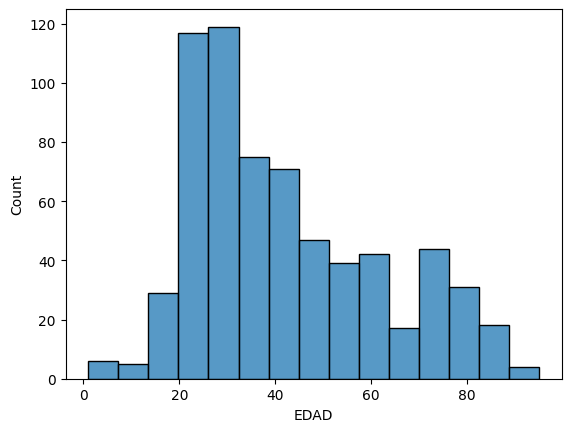

In [35]:
sns.histplot(df_homicidios_victimas['EDAD'])

c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age_mean', ylabel='Count'>

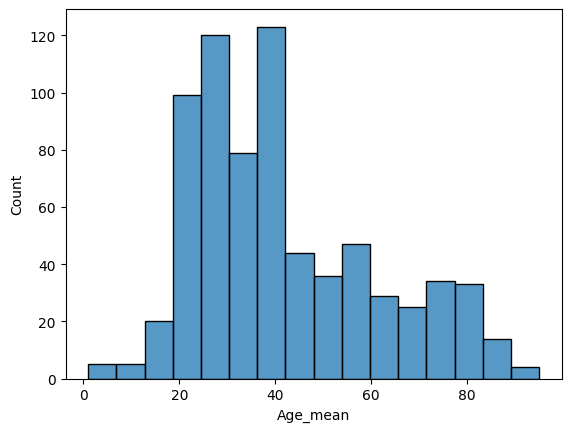

In [36]:
sns.histplot(df_homicidios_victimas['Age_mean'])

c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\f_cof\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age_knn', ylabel='Count'>

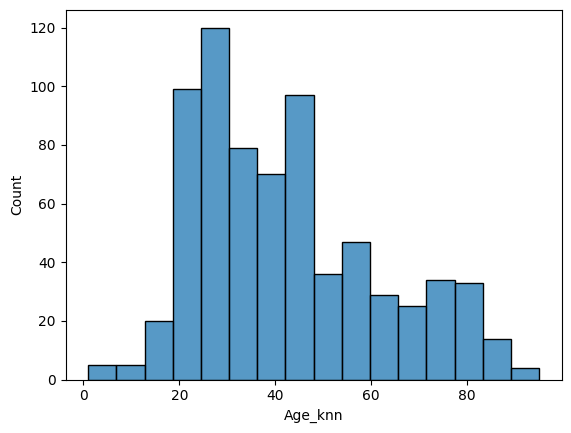

In [37]:
sns.histplot(df_homicidios_victimas['Age_knn'])

VAMOS A PROCEDER A IMPUTAR KNN EN LOS REGISTROS SIN EDAD DADO QUE PERMITE TENER UNA DISTRIBUCIÓN MAS SIMILAR A LA ORIGINAL

In [38]:
#Asignamos la columna de KNN a EDAD
df_homicidios_victimas['EDAD'] = df_homicidios_victimas['Age_knn']
#Borramos las columnas generadas
# Eliminar las columnas 'Age_knn' y 'Age_mean'
df_homicidios_victimas = df_homicidios_victimas.drop(['Age_knn', 'Age_mean'], axis=1)

df_homicidios_victimas.head()

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,CONDUCTOR,MASCULINO,18.0,SD
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00


- ID

Convertimos a INT y quitamos guion como hicimos con Hechos

In [39]:
# ID: Eliminar el guion y convertir la columna a tipo int
df_homicidios_victimas['ID']   = df_homicidios_victimas['ID'].str.replace('-', '').astype(int)

- FECHA_FALLECIMIENTO

A LOS QUE TENGAN SD LE VAMOS A IMPUTAR LA FECHA DEL HECHO

In [40]:
#Primero vemos cuantos tenemos en SD
df_homicidios_victimas[df_homicidios_victimas['FECHA_FALLECIMIENTO'] == 'SD'].shape[0]

68

In [41]:
# Crear un diccionario para mapear 'ID' a 'FECHA'
fecha_mapping = df_homicidios_hechos.set_index('ID')['FECHA'].to_dict()

# Actualizar 'FECHA_FALLECIMIENTO' en df_homicidios_victimas usando el mapeo
df_homicidios_victimas['FECHA_FALLECIMIENTO'] = df_homicidios_victimas['ID'].map(fecha_mapping)

In [42]:
#Luego de la imputación vemos que no quedaron fechas de fallecimiento sin datos.
df_homicidios_victimas[df_homicidios_victimas['FECHA_FALLECIMIENTO'] == 'SD'].shape[0]

0

REALIZAMOS CONVERSIONES EN LOS TIPOS DE DATOS

In [43]:
# ROL: Convertir la columna a tipo string
df_homicidios_victimas['ROL']  = df_homicidios_victimas['ROL'].astype(str)
# SEXO: Convertir la columna a tipo string
df_homicidios_victimas['SEXO'] = df_homicidios_victimas['SEXO'].astype(str)
# EDAD: Convertir la columna a tipo int
df_homicidios_victimas['EDAD'] = df_homicidios_victimas['EDAD'].astype(int)
# FECHA: Convertir la columna a tipo date
df_homicidios_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_homicidios_victimas['FECHA_FALLECIMIENTO'], format='%Y-%m-%d')

In [44]:
df_homicidios_victimas.head()

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,20160001,CONDUCTOR,MASCULINO,19,2016-01-01
1,20160002,CONDUCTOR,MASCULINO,70,2016-01-02
2,20160003,CONDUCTOR,MASCULINO,30,2016-01-03
3,20160004,CONDUCTOR,MASCULINO,18,2016-01-10
4,20160005,CONDUCTOR,MASCULINO,29,2016-01-21


- ELIMINAMOS DUPLICADOS EN AMBOS

In [45]:
#Vemos la cantidad de registro en ambos archivos
print("Shape de Hechos  : ", df_homicidios_hechos.shape)
print("Shape de Victimas: ", df_homicidios_victimas.shape)

Shape de Hechos  :  (684, 10)
Shape de Victimas:  (717, 5)


In [46]:
df_homicidios_hechos.drop_duplicates(inplace=True)
df_homicidios_victimas.drop_duplicates(inplace=True)

#Vemos la cantidad de registro en ambos archivos
print("Shape de Hechos  : ", df_homicidios_hechos.shape)
print("Shape de Victimas: ", df_homicidios_victimas.shape)

Shape de Hechos  :  (684, 10)
Shape de Victimas:  (717, 5)


==> no teníamos registros duplicados!

Como hemos eliminado registros de Hechos es muy probable que tengamos Victimas sin su correspondencia en Hechos, en ese caso eliminaremos el registro de victimas

In [47]:
df_homicidios_victimas[df_homicidios_victimas['ID'].isin(df_homicidios_hechos['ID'].values)]

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,20160001,CONDUCTOR,MASCULINO,19,2016-01-01
1,20160002,CONDUCTOR,MASCULINO,70,2016-01-02
2,20160003,CONDUCTOR,MASCULINO,30,2016-01-03
3,20160004,CONDUCTOR,MASCULINO,18,2016-01-10
4,20160005,CONDUCTOR,MASCULINO,29,2016-01-21
...,...,...,...,...,...
712,20210092,PEATON,FEMENINO,50,2021-12-12
713,20210093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-13
714,20210094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
715,20210095,CONDUCTOR,MASCULINO,27,2021-12-30


==> Tenemos 13 registros que perdieron su correspondencia en Hechos

In [48]:
#Realizamos la corrección
df_homicidios_victimas = df_homicidios_victimas[df_homicidios_victimas['ID'].isin(df_homicidios_hechos['ID'].values)]
#Vemos la cantidad de registro en ambos archivos
print("Shape de Hechos  : ", df_homicidios_hechos.shape)
print("Shape de Victimas: ", df_homicidios_victimas.shape)

Shape de Hechos  :  (684, 10)
Shape de Victimas:  (704, 5)


.

.

.

# **ANÁLISIS EXPLORATORIO DE DATOS (EN PROFUNDIDAD)**

<hr>

A continuación hare un análisis mas en profundidad de cada variable seleccionada para el modelo. Explicare de que tipo son las mismas y las cruzare entre si para detectar patrones entre las mismas.

<hr>

- Procedemos a realizar un merge para tener en un solo DF todos los datos

In [49]:
#Vemos la cantidad de registro en ambos archivos
print("Shape de Hechos  : ", df_homicidios_hechos.shape)
print("Shape de Victimas: ", df_homicidios_victimas.shape)

Shape de Hechos  :  (684, 10)
Shape de Victimas:  (704, 5)


In [50]:
# UNIMOS AMBOS DFs POR ID
df_homicidios = pd.merge(df_homicidios_hechos, df_homicidios_victimas, on='ID', how='inner')
#Renombramos las columnas agregadas
df_homicidios = df_homicidios.rename(columns={
    'ROL': 'ROL_VICT',
    'SEXO': 'SEXO_VICT',
    'EDAD': 'EDAD_VICT',
    'FECHA_FALLECIMIENTO': 'FECHA_FALLECIMIENTO_VICT'
})

In [51]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO,ROL_VICT,SEXO_VICT,EDAD_VICT,FECHA_FALLECIMIENTO_VICT
0,20160001,1,2016-01-01,04:00:00,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,20160002,1,2016-01-02,01:15:00,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,20160003,1,2016-01-03,07:00:00,AVENIDA,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,20160004,1,2016-01-10,00:00:00,AVENIDA,8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,2016-01-10
4,20160005,1,2016-01-21,05:20:00,AVENIDA,1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-01-21


In [52]:
df_homicidios.shape

(704, 14)

- Se puede ver que el inner join funciono correctamente, todas las victimas tenían un registro de hecho asociado.

In [53]:
#Visualizamos todas las columnas del Data Set
df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE', 'COMUNA', 'POS_X',
       'POS_Y', 'VICTIMA', 'ACUSADO', 'ROL_VICT', 'SEXO_VICT', 'EDAD_VICT',
       'FECHA_FALLECIMIENTO_VICT'],
      dtype='object')

.

.

#### <u>**TIPOS DE VARIABLES A TRATAR**</u>

- **N_VICTIMAS**: Cuantitativa discreta.
- **FECHA**: Temporal.
- **HORA**: Temporal o puede ser nulo.
- **TIPO_DE_CALLE**: Categórica nominal.
- **COMUNA**: Categórica nominal.
- **POS_X**: Cuantitativa continua.
- **POS_Y**: Cuantitativa continua.
- **VICTIMA**: Categórica nominal.
- **ACUSADO**: Categórica nominal.
- **ROL_VICT**: Categórica nominal.
- **SEXO_VICT**: Categórica nominal.
- **EDAD_VICT**: Cuantitativa discreta.
- **FECHA_FALLECIMIENTO_VICT**: Temporal o puede ser nulo.


==> **Cuantitativa discreta**: Datos numéricos que representan conteos y toman valores enteros.

==> **Temporal**: Datos relacionados con el tiempo.

==> **Categórica nominal**: Datos que representan categorías sin un orden intrínseco.

==> **Cuantitativa continua**: Datos numéricos que pueden tomar cualquier valor en un rango.

==> **Categórica ordinal**: Datos que representan categorías con un orden intrínseco.

.

.

.

<hr>

**ACLARACIÓN**


Importamos la librería de Warnings para evitar warnings en los gráficos y dejar mas limpio el notebook

<hr>

In [54]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<hr>

<u>**CANTIDAD DE VICTIMAS POR AñO**</u>

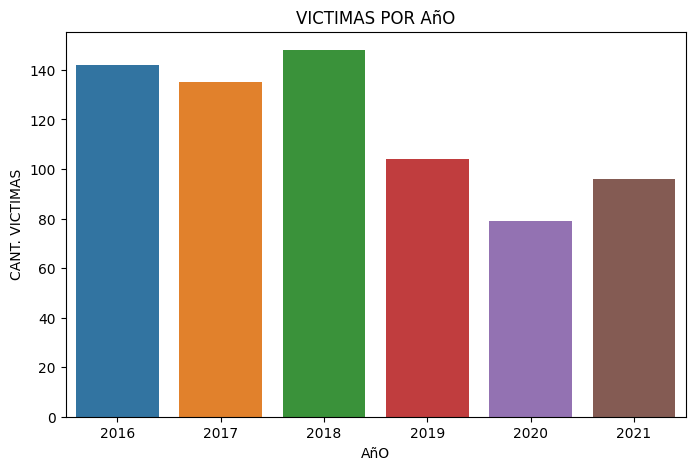

In [55]:
# GRAFICAMOS LA CANTIDAD DE VICTIMAS POR AñO
plt.figure(figsize=(8, 5))
sns.countplot(x=df_homicidios['FECHA'].dt.year, data=df_homicidios)
plt.title('VICTIMAS POR AñO')
plt.xlabel('AñO')
plt.ylabel('CANT. VICTIMAS')
plt.show()

Vemos que en el año **2018 se tuvo la mayor cantidad de Muertos**, cifras que se han reducido en los años siguientes.

.

.

<u>**PROPORCIÓN DE HOMICIDIOS SEGÚN EL TIPO DE CALLE**</u>

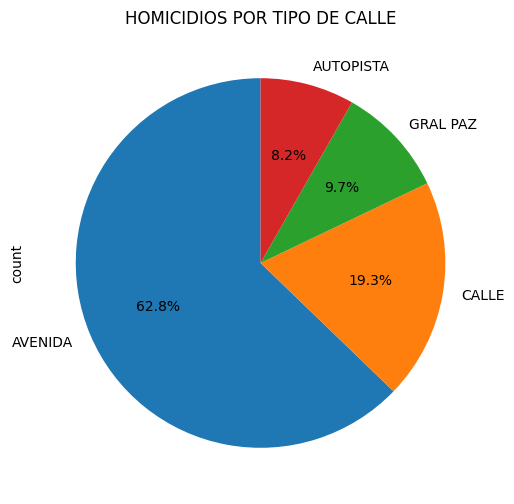

In [56]:
# GRAFICAMOS LA PROPORCIÓN DE HOMICIDIOS SEGÚN EL TIPO DE CALLE
plt.figure(figsize=(6, 6))
df_homicidios['TIPO_DE_CALLE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('HOMICIDIOS POR TIPO DE CALLE')
plt.show()

La mayor cantidad de hechos son originados en **AVENIDAS**.

.

.

<u>**HOMICIDIOS POR COMUNA**</u>

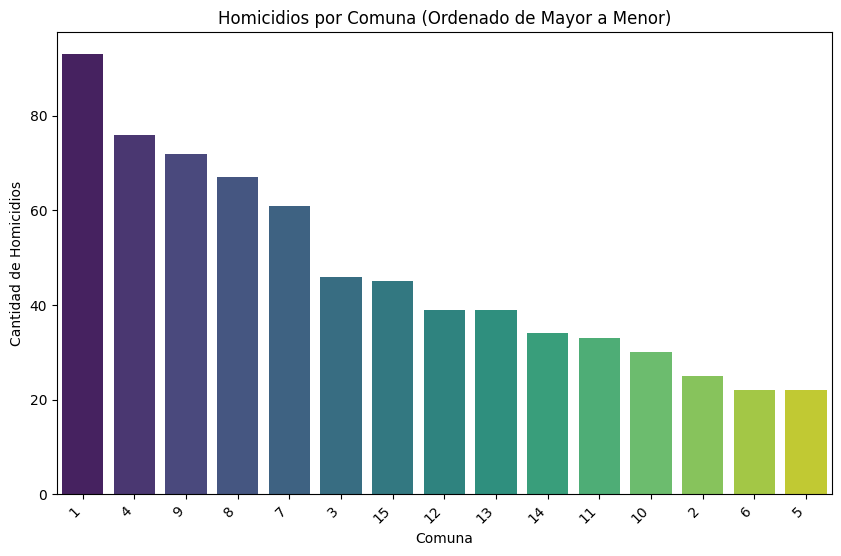

In [57]:
# GRAFICAMOS HOMICIDIOS POR COMUNA
plt.figure(figsize=(10, 6))
sns.countplot(x='COMUNA', data=df_homicidios, palette='viridis', order=df_homicidios['COMUNA'].value_counts().index)
plt.title('Homicidios por Comuna (Ordenado de Mayor a Menor)')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.show()

La comuna 1 RECOLETA es la que presenta **mayor tasa de Mortalidad**.

.

.

<u>**HOMICIDIOS EN FUNCIÓN DEL MES DEL AñO**</u>

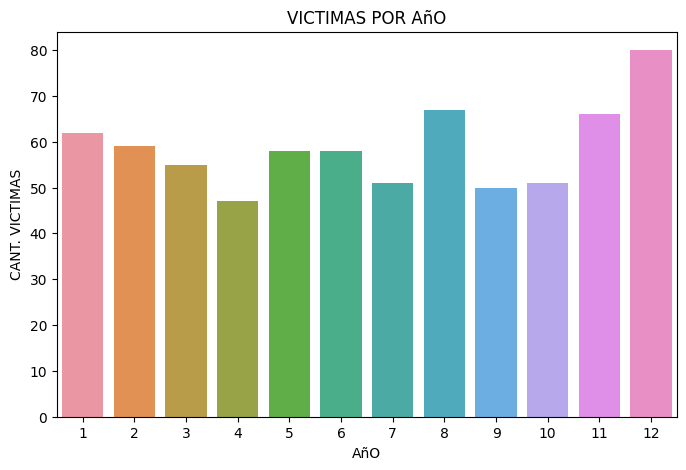

In [58]:
# GRAFICAMOS HOMICIDIOS EN FUNCIÓN DEL MES DEL AñO
plt.figure(figsize=(8, 5))
sns.countplot(x=df_homicidios['FECHA'].dt.month, data=df_homicidios)
plt.title('VICTIMAS POR AñO')
plt.xlabel('AñO')
plt.ylabel('CANT. VICTIMAS')
plt.show()

Se puede ver que **Diciembre es el mes con mas mortalidad**, sin embargo la diferencia no es muy notoria.

.

.

<u>**CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE VICTIMA**</u>

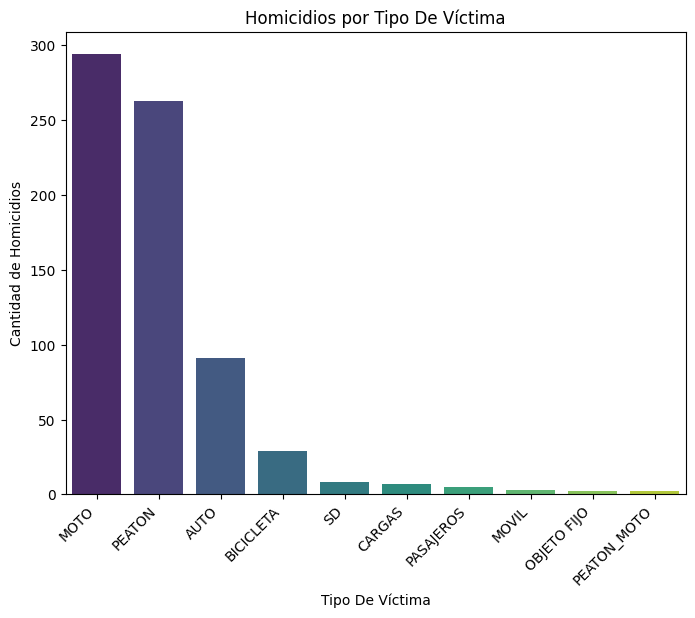

In [59]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE VICTIMA
plt.figure(figsize=(8, 6))
sns.countplot(x='VICTIMA', data=df_homicidios, palette='viridis', order=df_homicidios['VICTIMA'].value_counts().index)
plt.title('Homicidios por Tipo De Víctima')
plt.xlabel('Tipo De Víctima')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.show()

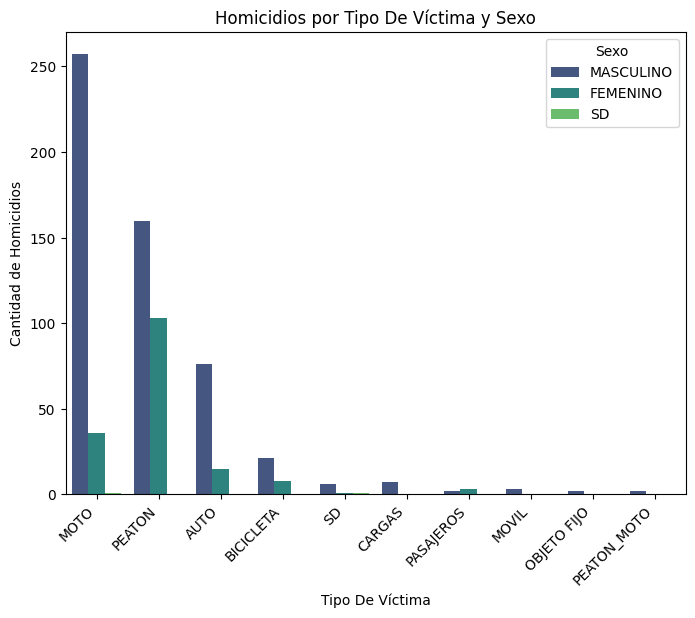

In [60]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE VICTIMA Y SEXO
plt.figure(figsize=(8, 6))
sns.countplot(x='VICTIMA', hue='SEXO_VICT', data=df_homicidios, palette='viridis', 
              order=df_homicidios['VICTIMA'].value_counts().index)
plt.title('Homicidios por Tipo De Víctima y Sexo')
plt.xlabel('Tipo De Víctima')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.show()

Las Victimas que iban en **Moto** o que eran **Peatones** representan a la mayoría de los hechos y para ambos casos el sexo **Masculino** tuvo la gran mayoría de Victimas Fatales

.

.

<u>**CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE ACUSADO**</u>

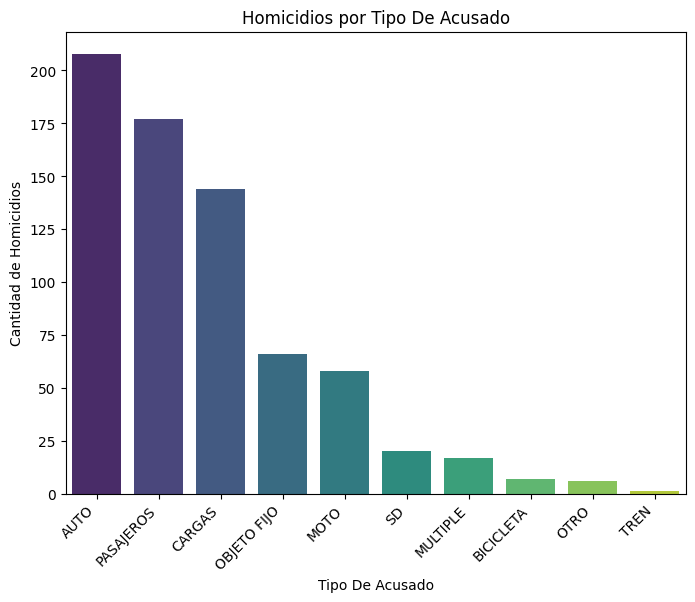

In [61]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE ACUSADO
plt.figure(figsize=(8, 6))
sns.countplot(x='ACUSADO', data=df_homicidios, palette='viridis', order=df_homicidios['ACUSADO'].value_counts().index)
plt.title('Homicidios por Tipo De Acusado')
plt.xlabel('Tipo De Acusado')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.show()

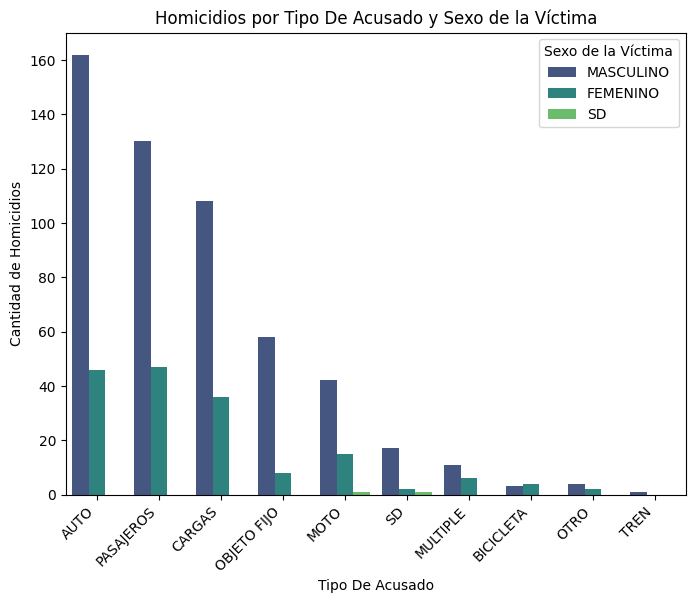

In [62]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE ACUSADO Y SEXO
plt.figure(figsize=(8, 6))
sns.countplot(x='ACUSADO', hue='SEXO_VICT', data=df_homicidios, palette='viridis',
              order=df_homicidios['ACUSADO'].value_counts().index)
plt.title('Homicidios por Tipo De Acusado y Sexo de la Víctima')
plt.xlabel('Tipo De Acusado')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo de la Víctima')
plt.show()

Dentro de los acusados, la **mayoría iba en AUTO**. En todos los casos el sexo **Masculino** tuvo mayor participación como Acusado.

.

.

<u>**CANTIDAD DE VICTIMAS SEGÚN EDAD**</u>

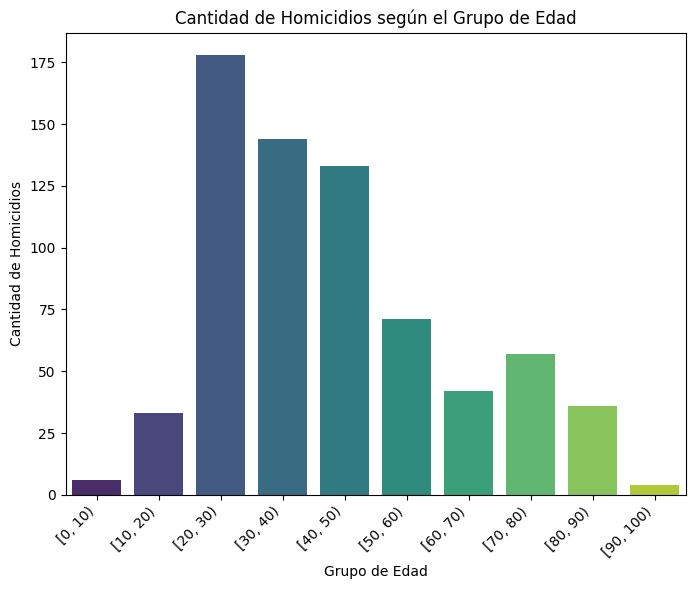

In [63]:
# GRAFICAMOS LA CANTIDAD DE VICTIMAS SEGÚN EDAD
# Convertir la columna 'EDAD_VICT' a entero y manejar valores no numéricos
df_homicidios['EDAD_VICT'] = pd.to_numeric(df_homicidios['EDAD_VICT'], errors='coerce')
# Agrupar las edades en rangos de 10 en 10
df_homicidios['EDAD_GRUPO'] = pd.cut(df_homicidios['EDAD_VICT'], bins=range(0, 101, 10), right=False)

# cantidad de homicidios según el grupo de edad, fraccionamos de 10 en 10
plt.figure(figsize=(8, 6))
sns.countplot(x='EDAD_GRUPO', data=df_homicidios, palette='viridis')
plt.title('Cantidad de Homicidios según el Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.show()

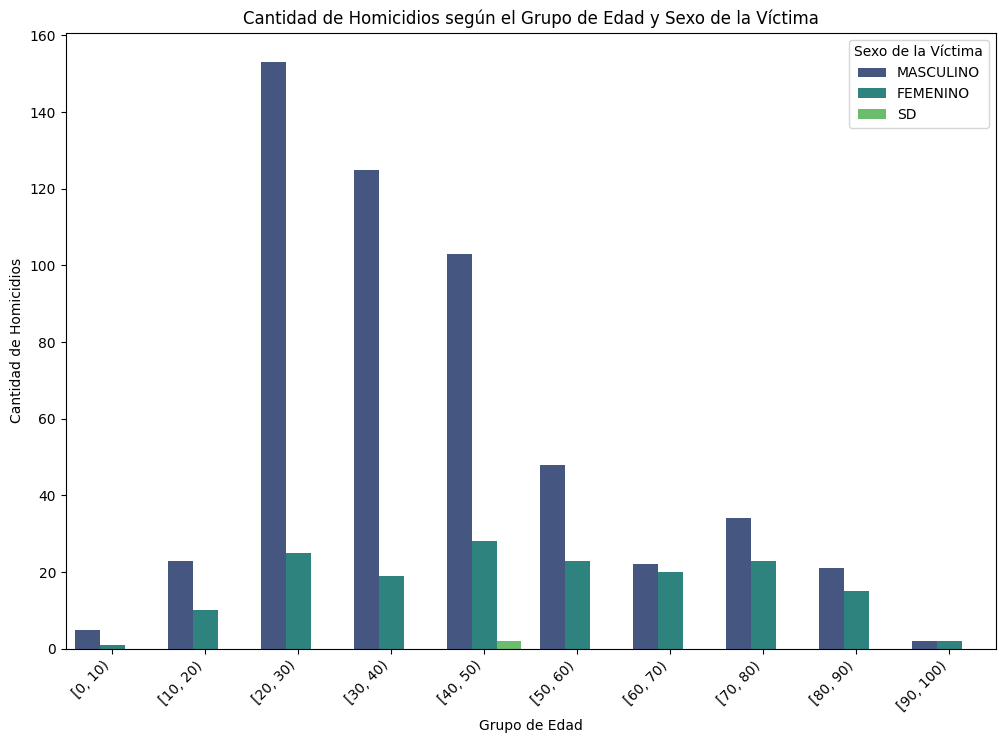

In [64]:
# GRAFICAMOS LA CANTIDAD DE VICTIMAS SEGÚN EDAD Y SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='EDAD_GRUPO', hue='SEXO_VICT', data=df_homicidios, palette='viridis')
plt.title('Cantidad de Homicidios según el Grupo de Edad y Sexo de la Víctima')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Homicidios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo de la Víctima')
plt.show()

El rango etario con mayor cantidad de Victimas Mortales es **entre 20 y 30 años**. En los rangos etarios por debajo de los 60 años el sexo Masculino tuvo mayor participación, pero en los rangos etarios superiores la participación es casi igualitaria entre ambos sexos.

.

.

<u>**CANTIDAD DE HOMICIDIOS SEGÚN SEXO**</u>

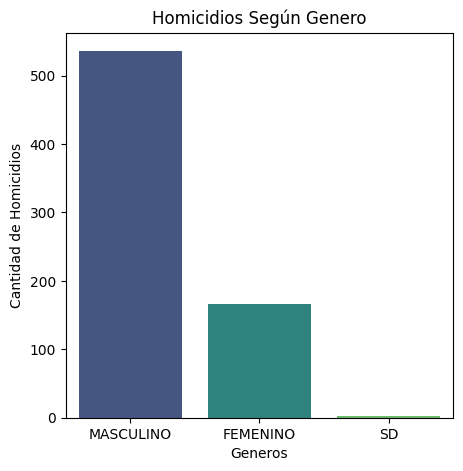

In [65]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN SEXO
plt.figure(figsize=(5, 5))
sns.countplot(x='SEXO_VICT', data=df_homicidios, palette='viridis')
plt.title('Homicidios Según Genero')
plt.xlabel('Generos')
plt.ylabel('Cantidad de Homicidios')
plt.show()

La mayoría de las victimas son de sexo **MASCULINO**.

<u>**CANTIDAD DE HOMICIDIOS SEGÚN ROL DE LA VICTIMA**</u>

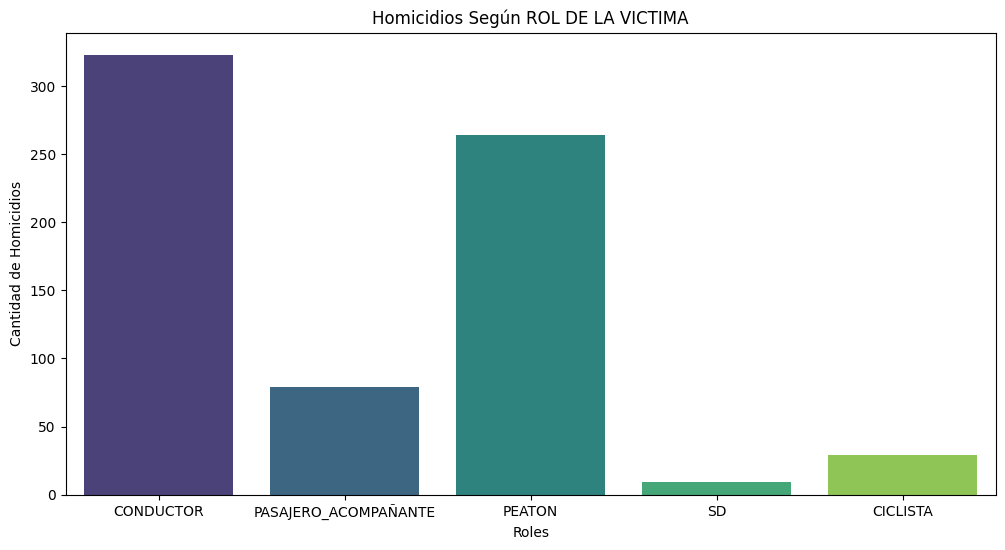

In [66]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN ROL DE LA VICTIMA
plt.figure(figsize=(12, 6))
sns.countplot(x='ROL_VICT', data=df_homicidios, palette='viridis')
plt.title('Homicidios Según ROL DE LA VICTIMA')
plt.xlabel('Roles')
plt.ylabel('Cantidad de Homicidios')
plt.show()

Los **CONDUCTORES y PEATONES** representan la gran mayoría de las victimas fatales.

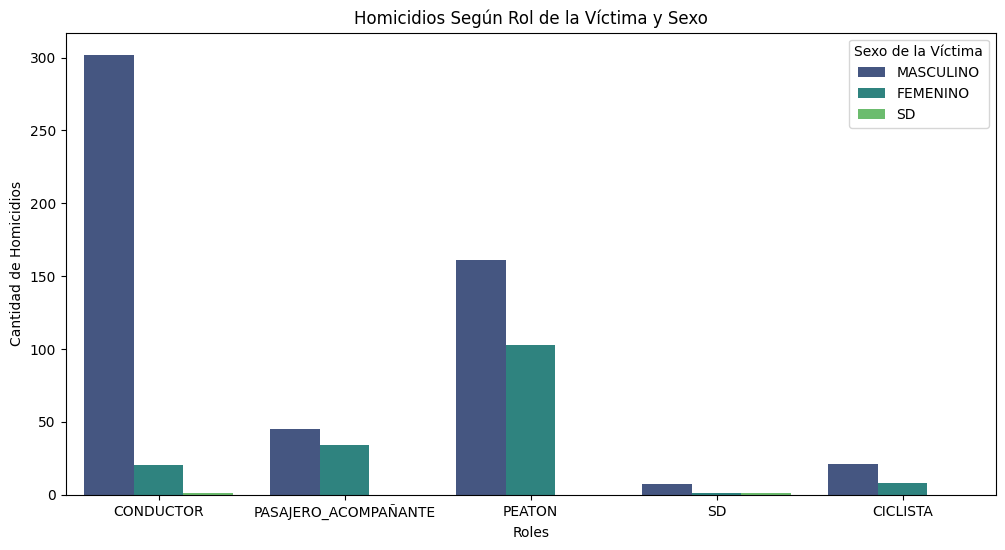

In [67]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN ROL DE LA VICTIMA Y SEXO
plt.figure(figsize=(12, 6))
sns.countplot(x='ROL_VICT', hue='SEXO_VICT', data=df_homicidios, palette='viridis')
plt.title('Homicidios Según Rol de la Víctima y Sexo')
plt.xlabel('Roles')
plt.ylabel('Cantidad de Homicidios')
plt.legend(title='Sexo de la Víctima')
plt.show()

Los **CONDUCTORES (donde casi el total pertenecen a sexo masculino) y PEATONES (con una distribución mas homogénea entre el sexo de la victima)** representan la gran mayoría de las victimas fatales.

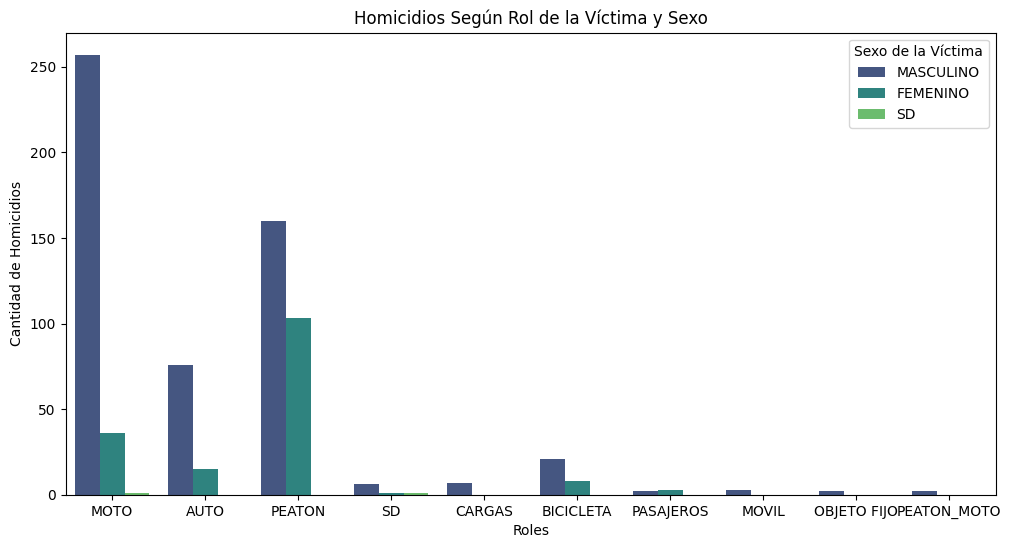

In [68]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE VICTIMA Y SEXO
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', hue='SEXO_VICT', data=df_homicidios, palette='viridis')
plt.title('Homicidios Según Rol de la Víctima y Sexo')
plt.xlabel('Roles')
plt.ylabel('Cantidad de Homicidios')
plt.legend(title='Sexo de la Víctima')
plt.show()

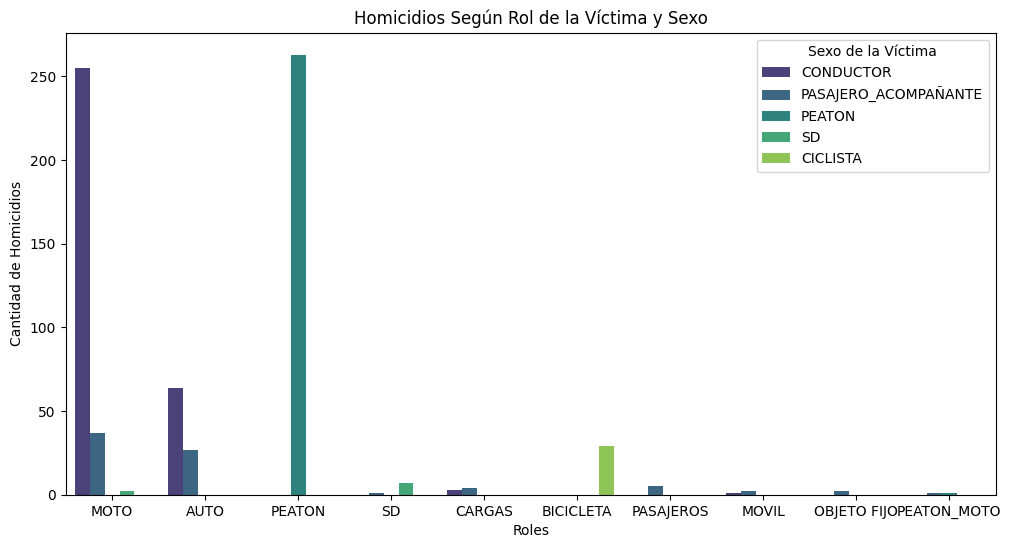

In [69]:
# GRAFICAMOS LA CANTIDAD DE HOMICIDIOS SEGÚN TIPO DE VICTIMA Y ROL DE LA VICTIMA
plt.figure(figsize=(12, 6))
sns.countplot(x='VICTIMA', hue='ROL_VICT', data=df_homicidios, palette='viridis')
plt.title('Homicidios Según Rol de la Víctima y Sexo')
plt.xlabel('Roles')
plt.ylabel('Cantidad de Homicidios')
plt.legend(title='Sexo de la Víctima')
plt.show()

Los **CONDUCTORES (donde la gran mayoría manejaba MOTO) y PEATONES** representan la gran mayoría de las victimas fatales.

.

.

### **ANÁLISIS DE VARIABLES CUANTITATIVAS**

En este caso analizaremos EDAD. Ya hemos analizado N_VICTIMAS y vimos que no tiene valores atípicos ni extremos. 

In [70]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,POS_X,POS_Y,VICTIMA,ACUSADO,ROL_VICT,SEXO_VICT,EDAD_VICT,FECHA_FALLECIMIENTO_VICT,EDAD_GRUPO
0,20160001,1,2016-01-01,04:00:00,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01,"[10, 20)"
1,20160002,1,2016-01-02,01:15:00,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02,"[70, 80)"
2,20160003,1,2016-01-03,07:00:00,AVENIDA,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03,"[30, 40)"
3,20160004,1,2016-01-10,00:00:00,AVENIDA,8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,2016-01-10,"[10, 20)"
4,20160005,1,2016-01-21,05:20:00,AVENIDA,1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-01-21,"[20, 30)"


In [71]:
# Calculamos estadísticas descriptivas
menor    = df_homicidios['EDAD_VICT'].min()
mayor    = df_homicidios['EDAD_VICT'].max()
moda     = df_homicidios['EDAD_VICT'].mode()[0]  # La moda puede ser múltiple, tomamos el primer valor
promedio = round(df_homicidios['EDAD_VICT'].mean())
mediana  = round(df_homicidios['EDAD_VICT'].median())

# Imprime los resultados
print(f'Menor Edad          : {menor}')
print(f'Mayor Edad          : {mayor}')
print(f'Moda de Edades      : {moda}')
print(f'Promedio de Edades  : {promedio}')
print(f'Mediana de Edades   : {mediana}')

Menor Edad          : 1
Mayor Edad          : 95
Moda de Edades      : 42
Promedio de Edades  : 42
Mediana de Edades   : 39


==> *La MODA se vio afectada por la imputación con KNN, si hubiésemos imputado el PROMEDIO tendríamos otra MODA.*

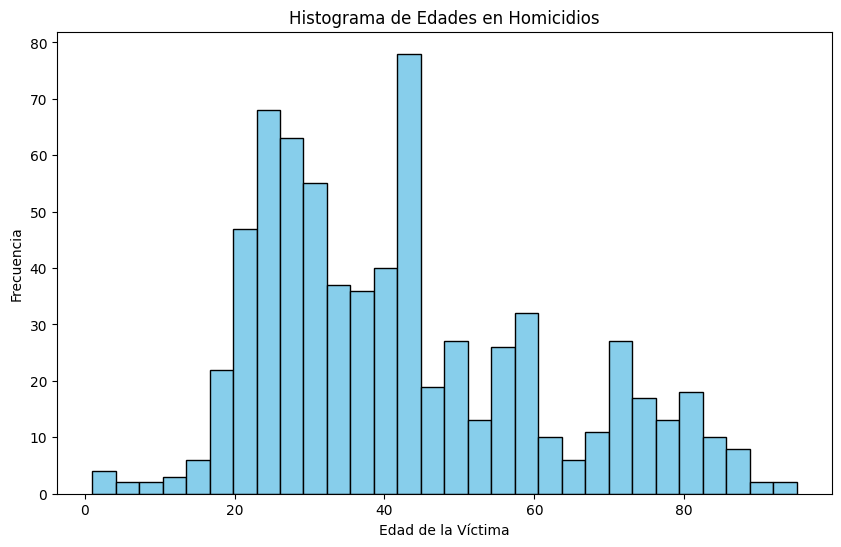

In [72]:
#Histograma: Vemos distribución general de las edades.
plt.figure(figsize=(10, 6))
plt.hist(df_homicidios['EDAD_VICT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Edades en Homicidios')
plt.xlabel('Edad de la Víctima')
plt.ylabel('Frecuencia')
plt.show()

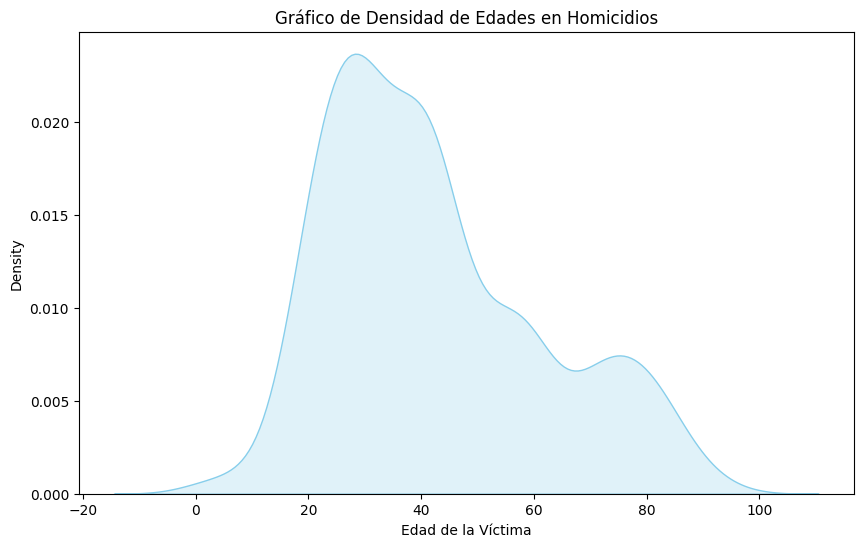

In [73]:
#Densidad: Representación suave de la distribución.
plt.figure(figsize=(10, 6))
sns.kdeplot(df_homicidios['EDAD_VICT'], color='skyblue', fill=True)
plt.title('Gráfico de Densidad de Edades en Homicidios')
plt.xlabel('Edad de la Víctima')
plt.show()

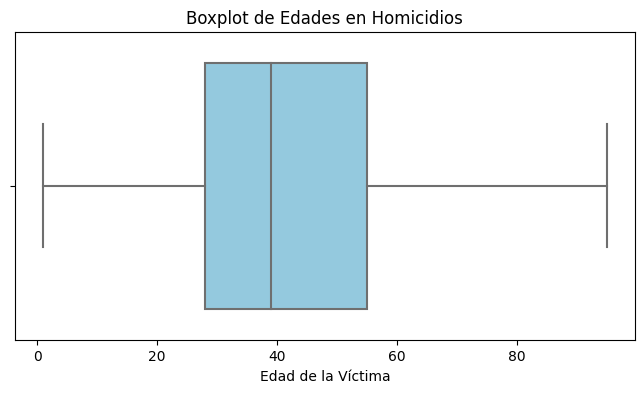

In [74]:
# BoxPlot: Vemos valores atípicos o extremos.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_homicidios['EDAD_VICT'], color='skyblue')

# Agregar título y etiquetas
plt.title('Boxplot de Edades en Homicidios')
plt.xlabel('Edad de la Víctima')

# Mostrar el gráfico
plt.show()

No Se observan valores Atípicos. Están dentro del rango posible de edades.

.

.

.


# **ARCHIVOS COMPLEMENTARIOS**

<hr>

A continuación haremos uso de archivo complementarios que serán necesarios para el correcto funcionamiento del DASHBOARD.

<hr>

.

.

## <u>**1 - COMUNAS DE CABA**</u>


Fue obtenido de la pagina oficial del **gobierno de la ciudad de Buenos Aires**. Contiene el listado de las comunas con su ID y descripción (Localidades que abarca).

In [75]:
df_comunas = leerExcel("Datos/", "comunas.xlsx", "comunas")
df_comunas.head()

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA
0,1,LIMITE COMUNAL,2,RECOLETA,21452.838648,6.317265e+06
1,2,LIMITE COMUNAL,5,ALMAGRO - BOEDO,12323.432479,6.660603e+06
2,3,LIMITE COMUNAL,6,CABALLITO,10990.964471,6.851029e+06
3,4,LIMITE COMUNAL,7,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07
4,5,LIMITE COMUNAL,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07


In [76]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['ID', 'OBJETO', 'PERIMETRO', 'AREA']
df_comunas = df_comunas.drop(columnas_a_eliminar, axis=1)

In [77]:
df_comunas.head()

,COMUNAS,BARRIOS
0,2,RECOLETA
1,5,ALMAGRO - BOEDO
2,6,CABALLITO
3,7,FLORES - PARQUE CHACABUCO
4,9,LINIERS - MATADEROS - PARQUE AVELLANEDA


In [78]:
# Ordenar el DataFrame por la columna 'COMUNAS' de forma ascendente
df_comunas = df_comunas.sort_values(by='COMUNAS', ascending=True)
df_comunas.head()

,COMUNAS,BARRIOS
13,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...
0,2,RECOLETA
9,3,BALVANERA - SAN CRISTOBAL
12,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...
1,5,ALMAGRO - BOEDO


In [79]:
# SEXO: Convertir la columna a tipo string
df_comunas['COMUNAS'] = df_comunas['COMUNAS'].astype(int)
# EDAD: Convertir la columna a tipo int
df_comunas['BARRIOS'] = df_comunas['BARRIOS'].astype(str)

df_comunas.head()

,COMUNAS,BARRIOS
13,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...
0,2,RECOLETA
9,3,BALVANERA - SAN CRISTOBAL
12,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...
1,5,ALMAGRO - BOEDO


.

.

## <u>**2 - POBLACIÓN POR PROVINCIA+CABA**</u>

Fue obtenido de la pagina oficial del **INDEC**. Contiene la información sobre la cantidad de población por año y provincia, CABA esta discriminada como una provincia mas.

In [80]:
df_poblacion = leerExcel("Datos/", "c1_proyecciones_prov_2010_2040.xls", "02-CABA",4)
df_poblacion.head()

,Año,Ambos sexos,Varones,Mujeres
0,NaN,NaN,NaN,NaN
1,2010,3028481.0,1405566.0,1622915.0
2,2011,3033639.0,1409835.0,1623804.0
3,2012,3038860.0,1414105.0,1624755.0
4,2013,3044076.0,1418339.0,1625737.0


In [81]:
# Eliminar las filas donde todas las columnas tienen NaN
df_poblacion.dropna(how='all', inplace=True)

df_poblacion

,Año,Ambos sexos,Varones,Mujeres
1,2010,3028481.0,1405566.0,1622915.0
2,2011,3033639.0,1409835.0,1623804.0
3,2012,3038860.0,1414105.0,1624755.0
4,2013,3044076.0,1418339.0,1625737.0
5,2014,3049229.0,1422507.0,1626722.0
6,2015,3054267.0,1426582.0,1627685.0
7,2016,3059122.0,1430531.0,1628591.0
8,2017,3063728.0,1434323.0,1629405.0
9,2018,3068043.0,1437936.0,1630107.0
10,2019,3072029.0,1441350.0,1630679.0


In [82]:
df_poblacion.shape

(32, 4)

In [83]:
# Eliminar la última fila
df_poblacion = df_poblacion.drop(df_poblacion.index[-1])

df_poblacion

,Año,Ambos sexos,Varones,Mujeres
1,2010,3028481.0,1405566.0,1622915.0
2,2011,3033639.0,1409835.0,1623804.0
3,2012,3038860.0,1414105.0,1624755.0
4,2013,3044076.0,1418339.0,1625737.0
5,2014,3049229.0,1422507.0,1626722.0
6,2015,3054267.0,1426582.0,1627685.0
7,2016,3059122.0,1430531.0,1628591.0
8,2017,3063728.0,1434323.0,1629405.0
9,2018,3068043.0,1437936.0,1630107.0
10,2019,3072029.0,1441350.0,1630679.0


In [84]:
# Cambiar los nombres de las columnas
df_poblacion.rename(columns=lambda x: x.strip().replace(' ', '_').upper(), inplace=True)

In [85]:
df_poblacion.head()

,AÑO,AMBOS_SEXOS,VARONES,MUJERES
1,2010,3028481.0,1405566.0,1622915.0
2,2011,3033639.0,1409835.0,1623804.0
3,2012,3038860.0,1414105.0,1624755.0
4,2013,3044076.0,1418339.0,1625737.0
5,2014,3049229.0,1422507.0,1626722.0


In [86]:
#Convertimos las columnas al tipo de dato correspondiente
df_poblacion['AÑO']         = df_poblacion['AÑO'].astype(int)
df_poblacion['AMBOS_SEXOS'] = df_poblacion['AMBOS_SEXOS'].astype(int)
df_poblacion['VARONES']     = df_poblacion['VARONES'].astype(int)
df_poblacion['MUJERES']     = df_poblacion['MUJERES'].astype(int)

In [87]:
df_poblacion.head()

,AÑO,AMBOS_SEXOS,VARONES,MUJERES
1,2010,3028481,1405566,1622915
2,2011,3033639,1409835,1623804
3,2012,3038860,1414105,1624755
4,2013,3044076,1418339,1625737
5,2014,3049229,1422507,1626722


.

.

.

# **CONCLUSIONES DEL EDA**

<hr>

- Luego del análisis exploratorio se concluyo que la gran parte de los siniestros se corresponden a Victimas en **MOTO o PEATONES**. 
- A su vez, independientemente del medio, el sexo con mayor tasa de mortalidad es el **MASCULINO**. 
- El tipo de calle con mayor tasa de mortalidad son las **AVENIDAS**.
- **NO hay valores ATÍPICOS** que requieran un tratamiento especial antes de avanzar al DASHBOARD.
- Luego del pico de muertes registrado en 2018, la tasa de mortalidad ha tenido **TENDENCIA BAJISTA**.
- Si bien las cantidades son no tan dispares, el mes con mayor tasa de mortalidad es **DICIEMBRE**.


.

.

 ==> *El resto de transformaciones de realizaran en POWER BI*.

<hr>

# <u>**EXPORTACIÓN DE DFs**</u>

A continuación se hace la exportación de los DF generados hacia archivos **CSV**. Estos serán consumidos por **POWER BI**.

In [88]:
exportarDf(df_comunas, 'Datos/', 'comunas')

True

In [89]:
exportarDf(df_homicidios_hechos, 'Datos/', 'hechos')

True

In [90]:
exportarDf(df_homicidios_victimas, 'Datos/', 'victimas')

True

In [91]:
exportarDf(df_poblacion, 'Datos/', 'poblacion')

True